<a href="https://colab.research.google.com/github/RylieWeaver9/Optimization/blob/main/Cutting%20Plane%20Method%20(Center%20of%20Gravity).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cutting Plane Method (Center of Gravity)

### 1D Practice Case

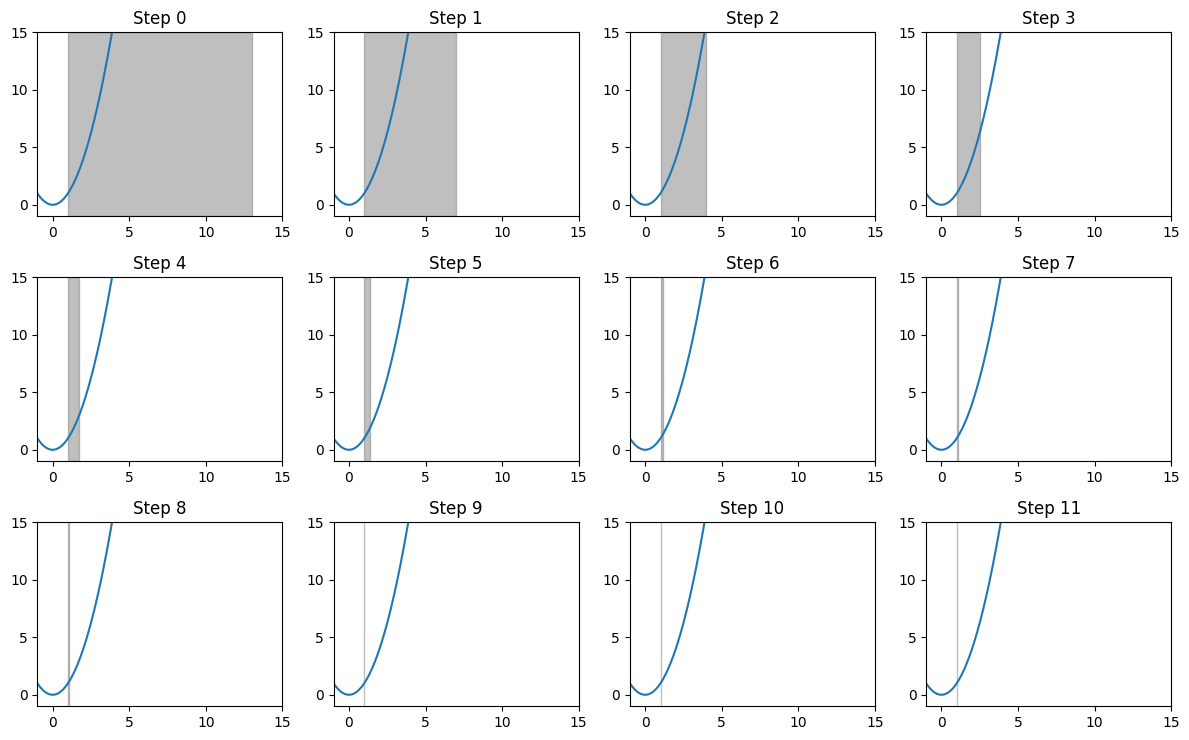

1.0050125313283207


In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the x values
x_lb = -1
x_ub = 15
x = np.linspace(x_lb, x_ub, 400)

# Functions
def f(x):
  return x**2
def subgrad_f(x):
  return 2*x
y = f(x)

# Preliminary shading
a = x_lb+2
b = x_ub-2
condition_0 = (a <= x) & (x <= b)

# Plane cutting loop
n = 12  # Number of iterations
num_cols = 4
num_rows = math.ceil(n / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(3*num_cols, 2.5*num_rows))

conditions = [condition_0]  # To include initial condition in list
for i in range(n-1):
    c_i = np.mean(x[conditions[-1]])  # Using the last condition in the list
    condition_i = (subgrad_f(c_i)*x <= subgrad_f(c_i)*c_i)
    conditions.append(conditions[-1] & condition_i)  # Update the list of conditions

# Now we plot based on the conditions
for i, condition in enumerate(conditions):
    # Choose the appropriate subplot
    ax = axes[i // num_cols, i % num_cols]
    ax.fill_between(x, x_lb, x_ub, where=condition, color='gray', alpha=0.5)

    # Plot the Graph
    ax.plot(x, y)
    ax.set_xlim(x_lb, x_ub)
    ax.set_ylim(-1, 15)
    ax.set_title(f'Step {i}')

plt.tight_layout()
plt.show()

# Final prints
print(c_i)

After 11 iterations, we do get close to the (within our constrained domain) optimal value of x=1.

### Now, Actual HW Problem:

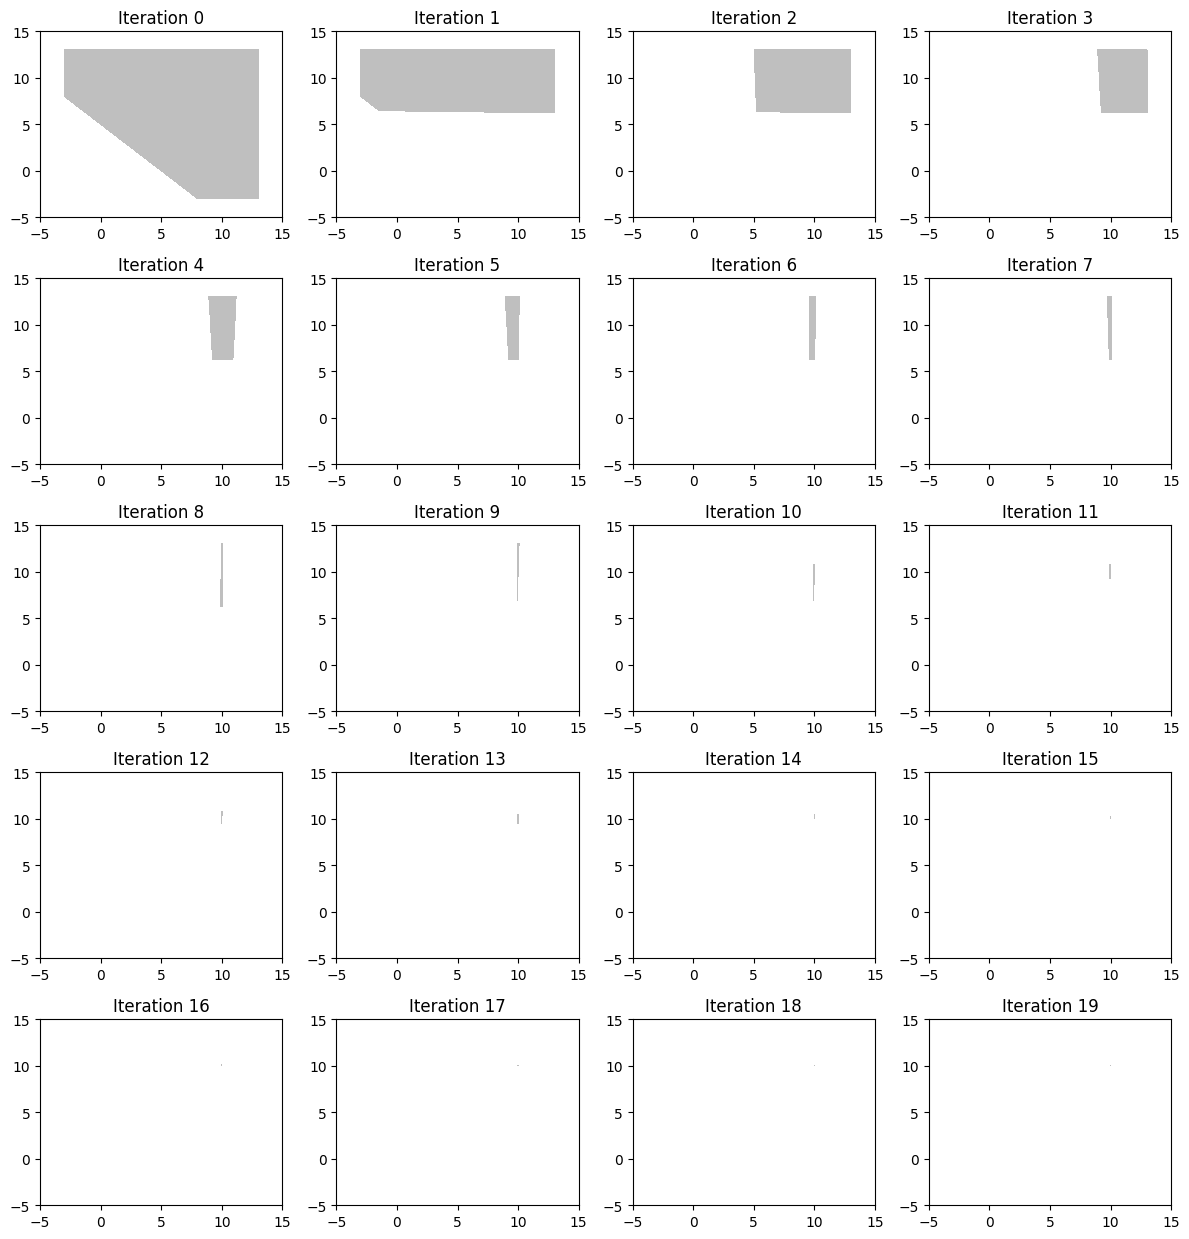

9.994994994994995 10.005005005005005


In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the x and y values
x_lb, x_ub = -5, 15
y_lb, y_ub = -5, 15
x = np.linspace(x_lb, x_ub, 1000)
y = np.linspace(y_lb, y_ub, 1000)
X, Y = np.meshgrid(x, y)

# Functions
t=3
X_0=10
Y_0=10
def f(X, Y):
    return t*abs(X_0-X) + (Y_0-Y)**4
def subgrad_f(X, Y):
    # For the term t|X_0-X|
    if X < X_0:
        g_X = -t
    elif X > X_0:
        g_X = t
    else: # X == 1
        g_X = 0

    # For the term (-1-Y)^4
    g_Y = -4 * (Y_0 - Y)**3

    return g_X, g_Y

# Preliminary shading
a, b = x_lb + 2, x_ub - 2
c, d = y_lb + 2, y_ub - 2
condition_0 = (a <= X) & (X <= b) & (c <= Y) & (Y <= d) & (a/2 + b/2 <= X+Y)

# PLooping and plotting parameters
n = 20
num_cols = 4
num_rows = math.ceil(n / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(3*num_cols, 2.5*num_rows))

# Cutting plane loop... done through stored array of conditions
conditions = [condition_0]
for i in range(n-1):
    c_x = np.mean(X[conditions[-1]])
    c_y = np.mean(Y[conditions[-1]])
    grad_x, grad_y = subgrad_f(c_x, c_y)
    condition_i = (grad_x*X + grad_y*Y <= grad_x*c_x + grad_y*c_y)
    conditions.append(conditions[-1] & condition_i)

# Visualization
for i, condition in enumerate(conditions):
    ax = axes[i // num_cols, i % num_cols]
    ax.contourf(X, Y, condition.astype(int), levels=[0.5, 1.5], colors='gray', alpha=0.5)
    ax.set_xlim(x_lb, x_ub)
    ax.set_ylim(y_lb, y_ub)
    ax.set_title(f'Iteration {i}')

plt.tight_layout()
plt.show()

# Final prints
print(c_x, c_y)


The average value in the region after 19 cutting plane iterations is approximately (10, 10), which is what we expect from our optimization function given that (10, 10) is optimal within the contrained domain.